# Characterization of airlines based on delay time

## Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

## Reading data from file

In [2]:
flights = pd.read_csv("flights.txt", sep="|")

In [3]:
flights.shape

(1191805, 31)

In [4]:
flights['FLIGHTDATE'] = pd.to_datetime(flights['FLIGHTDATE'], format='%Y%m%d')

In [5]:
flights.dtypes

TRANSACTIONID                 int64
FLIGHTDATE           datetime64[ns]
AIRLINECODE                  object
AIRLINENAME                  object
TAILNUM                      object
FLIGHTNUM                     int64
ORIGINAIRPORTCODE            object
ORIGAIRPORTNAME              object
ORIGINCITYNAME               object
ORIGINSTATE                  object
ORIGINSTATENAME              object
DESTAIRPORTCODE              object
DESTAIRPORTNAME              object
DESTCITYNAME                 object
DESTSTATE                    object
DESTSTATENAME                object
CRSDEPTIME                    int64
DEPTIME                     float64
DEPDELAY                    float64
TAXIOUT                     float64
WHEELSOFF                   float64
WHEELSON                    float64
TAXIIN                      float64
CRSARRTIME                    int64
ARRTIME                     float64
ARRDELAY                    float64
CRSELAPSEDTIME              float64
ACTUALELAPSEDTIME           

In [6]:
flights.iloc[:,16:].head()

,CRSDEPTIME,DEPTIME,DEPDELAY,TAXIOUT,WHEELSOFF,WHEELSON,TAXIIN,CRSARRTIME,ARRTIME,ARRDELAY,CRSELAPSEDTIME,ACTUALELAPSEDTIME,CANCELLED,DIVERTED,DISTANCE
0,1425,1425.0,0.0,8.0,1433.0,1648.0,4.0,1655,1652.0,-3.0,90.0,87.0,F,False,580 miles
1,1130,1136.0,6.0,12.0,1148.0,1419.0,16.0,1426,1435.0,9.0,116.0,119.0,False,F,744 miles
2,1215,1338.0,83.0,7.0,1345.0,1618.0,2.0,1500,1620.0,80.0,105.0,102.0,F,False,718 miles
3,1925,1925.0,0.0,5.0,1930.0,1947.0,1.0,1950,1948.0,-2.0,85.0,83.0,0,0,487 miles
4,1455,1453.0,-2.0,11.0,1504.0,1742.0,5.0,1750,1747.0,-3.0,115.0,114.0,F,False,744 miles


## Manipulating and organizing data

In [7]:
columns = ['FLIGHTDATE','AIRLINENAME','DEPDELAY','ARRDELAY']

In [8]:
flights_X = flights.loc[:,columns]

In [9]:
flights_X.head()

,FLIGHTDATE,AIRLINENAME,DEPDELAY,ARRDELAY
0,2002-01-01,Southwest Airlines Co.: WN,0.0,-3.0
1,2002-01-01,Continental Air Lines Inc.: CO,6.0,9.0
2,2002-01-01,Southwest Airlines Co.: WN,83.0,80.0
3,2002-01-01,Southwest Airlines Co.: WN,0.0,-2.0
4,2002-01-03,Continental Air Lines Inc.: CO,-2.0,-3.0


### Distribution

- Departure:
    - Positive values: Delay time (Analysis)
    - Negative values: Early time
- Arrival:
    - Positive values: Delay time (Analysis)
    - Negative values: Early time

#### Analysis Delay Time - Positive values

- #### Departure

In [10]:
dep = flights_X[flights_X["DEPDELAY"]>0]

In [11]:
dep

,FLIGHTDATE,AIRLINENAME,DEPDELAY,ARRDELAY
1,2002-01-01,Continental Air Lines Inc.: CO,6.0,9.0
2,2002-01-01,Southwest Airlines Co.: WN,83.0,80.0
5,2002-01-03,Southwest Airlines Co.: WN,27.0,21.0
6,2002-01-04,Delta Air Lines Inc.: DL,167.0,168.0
7,2002-01-05,Delta Air Lines Inc.: DL,105.0,111.0
...,...,...,...,...
1191776,2013-01-04,Envoy Air: MQ,49.0,51.0
1191779,2013-01-04,AirTran Airways Corporation: FL,7.0,4.0
1191789,2013-01-05,Delta Air Lines Inc.: DL,1.0,-13.0
1191793,2013-01-06,Delta Air Lines Inc.: DL,20.0,25.0


- #### Removing outliers from DEPDELAY

In [12]:
q3 = dep["DEPDELAY"].quantile(0.75)
q1 = dep["DEPDELAY"].quantile(0.25)
iqr = q3 - q1

In [13]:
dep = dep.loc[(dep["DEPDELAY"] >= (q1 - 1.5*iqr)) & (dep["DEPDELAY"] <= (q3 + 1.5*iqr))]

In [14]:
dep.shape

(390479, 4)

- #### Arrival

In [15]:
arr = flights_X[flights_X["ARRDELAY"]>0]

In [16]:
arr

,FLIGHTDATE,AIRLINENAME,DEPDELAY,ARRDELAY
1,2002-01-01,Continental Air Lines Inc.: CO,6.0,9.0
2,2002-01-01,Southwest Airlines Co.: WN,83.0,80.0
5,2002-01-03,Southwest Airlines Co.: WN,27.0,21.0
6,2002-01-04,Delta Air Lines Inc.: DL,167.0,168.0
7,2002-01-05,Delta Air Lines Inc.: DL,105.0,111.0
...,...,...,...,...
1191765,2013-01-04,Delta Air Lines Inc.: DL,16.0,10.0
1191776,2013-01-04,Envoy Air: MQ,49.0,51.0
1191779,2013-01-04,AirTran Airways Corporation: FL,7.0,4.0
1191793,2013-01-06,Delta Air Lines Inc.: DL,20.0,25.0


- #### Removing outliers from ARRDELAY

In [17]:
q3 = arr["ARRDELAY"].quantile(0.75)
q1 = arr["ARRDELAY"].quantile(0.25)
iqr = q3 - q1

In [18]:
arr = arr.loc[(arr["ARRDELAY"] >= (q1 - 1.5*iqr)) & (arr["ARRDELAY"] <= (q3 + 1.5*iqr))]

In [19]:
arr.shape

(435385, 4)

#### Boxplot DEPDELAY & ARRDELAY

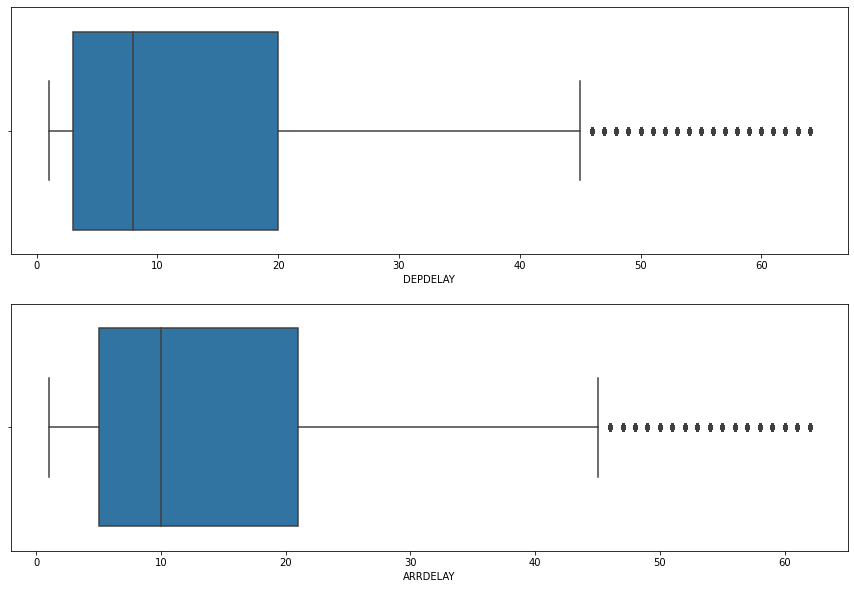

In [20]:
fig,axs = plt.subplots(2,1,figsize=(15,10))
_ = sns.boxplot(x=dep['DEPDELAY'],ax=axs[0])
_ = sns.boxplot(x=arr['ARRDELAY'],ax=axs[1])

### Grouping data

In [21]:
dep = dep.groupby([pd.Grouper(key="FLIGHTDATE", freq="Y"),"AIRLINENAME"]).agg({'DEPDELAY':np.sum})

In [22]:
dep

DEPDELAY
FLIGHTDATE AIRLINENAME                                                 
1992-12-31 Alaska Airlines Inc.: AS                              2390.0
           America West Airlines Inc.: HP (Merged with US ...    6123.0
           American Airlines Inc.: AA                           27050.0
           Continental Air Lines Inc.: CO                       13896.0
           Delta Air Lines Inc.: DL                             42625.0
...                                                                 ...
2016-12-31 SkyWest Airlines Inc.: OO                            14649.0
           Southwest Airlines Co.: WN                           48810.0
           Spirit Air Lines: NK                                  5725.0
           United Air Lines Inc.: UA                            16379.0
           Virgin America: VX                                    2970.0

[272 rows x 1 columns]

In [23]:
arr = arr.groupby([pd.Grouper(key="FLIGHTDATE", freq="Y"),"AIRLINENAME"]).agg({'ARRDELAY':np.sum})

In [24]:
arr

ARRDELAY
FLIGHTDATE AIRLINENAME                                                 
1992-12-31 Alaska Airlines Inc.: AS                              5076.0
           America West Airlines Inc.: HP (Merged with US ...    7445.0
           American Airlines Inc.: AA                           45285.0
           Continental Air Lines Inc.: CO                       23605.0
           Delta Air Lines Inc.: DL                             60506.0
...                                                                 ...
2016-12-31 SkyWest Airlines Inc.: OO                            16905.0
           Southwest Airlines Co.: WN                           42995.0
           Spirit Air Lines: NK                                  6215.0
           United Air Lines Inc.: UA                            12745.0
           Virgin America: VX                                    2778.0

[272 rows x 1 columns]

In [25]:
dep.reset_index(inplace=True)
arr.reset_index(inplace=True)

In [36]:
# Identical values, it can be concatenated
dep['AIRLINENAME'].tolist() == arr['AIRLINENAME'].tolist()

True

In [42]:
delay_time = pd.concat([dep,arr['ARRDELAY']],axis=1)

In [45]:
delay_time['TOTALDELAY'] = delay_time['DEPDELAY'] + delay_time['ARRDELAY']

In [46]:
delay_time

,FLIGHTDATE,AIRLINENAME,DEPDELAY,ARRDELAY,TOTALDELAY
0,1992-12-31,Alaska Airlines Inc.: AS,2390.0,5076.0,7466.0
1,1992-12-31,America West Airlines Inc.: HP (Merged with US...,6123.0,7445.0,13568.0
2,1992-12-31,American Airlines Inc.: AA,27050.0,45285.0,72335.0
3,1992-12-31,Continental Air Lines Inc.: CO,13896.0,23605.0,37501.0
4,1992-12-31,Delta Air Lines Inc.: DL,42625.0,60506.0,103131.0
...,...,...,...,...,...
267,2016-12-31,SkyWest Airlines Inc.: OO,14649.0,16905.0,31554.0
268,2016-12-31,Southwest Airlines Co.: WN,48810.0,42995.0,91805.0
269,2016-12-31,Spirit Air Lines: NK,5725.0,6215.0,11940.0
270,2016-12-31,United Air Lines Inc.: UA,16379.0,12745.0,29124.0
